In [1]:
import numpy as np
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
def analyse_results(params, vanilla_result, robust_result, robust_title, attack_name, param_symbol):
    
    vanilla_acc = vanilla_result["initial_acc"]
    vanilla_attack_accs = np.array(vanilla_result["attack_accs"])
    vanilla_fracs = vanilla_attack_accs / vanilla_acc
    
    df = {
        param_symbol: [0.0,] + params,
        'vanilla': [vanilla_acc,] + vanilla_attack_accs.tolist(),
    }
    columns = [param_symbol, "vanilla"]
    
    figure, axes = plt.subplots(nrows=int(np.ceil(len(robust_result) / 2)), ncols=2, figsize=(14, 14))

    for i, result in enumerate(robust_result):
        alpha = result["alpha"]
        robust_acc = result["initial_acc"]
        robust_attack_accs = np.array(result["attack_accs"])
        robust_fracs = robust_attack_accs / robust_acc

        col_name = "alpha = " + str(alpha)
        df[col_name] = [robust_acc,] + robust_attack_accs.tolist()
        columns.append(col_name)
        
        ax = axes[i // 2, i % 2]

        ax.plot(params, vanilla_fracs, label="Vanilla, acc = " + str(round(vanilla_acc, 4)))
        ax.plot(params, robust_fracs, label=robust_title + ", $\\alpha = " + str(alpha) + "$, acc = " + str(round(robust_acc, 4)))
        ax.set_xlabel("$\\" + param_symbol + "$")
        ax.set_ylabel("attack_accuracy / initial_accuracy")
        ax.legend()

    figure.delaxes(axes[-1][-1])
    figure.suptitle(attack_name + " attack, " + robust_title + " pooling", fontsize=16)
    plt.show() 
    
    df = pd.DataFrame(df, columns=columns)

    return df

## Gaussian Noise

In [12]:
with open('result_gn.json') as json_file:
    result_gn = json.load(json_file)

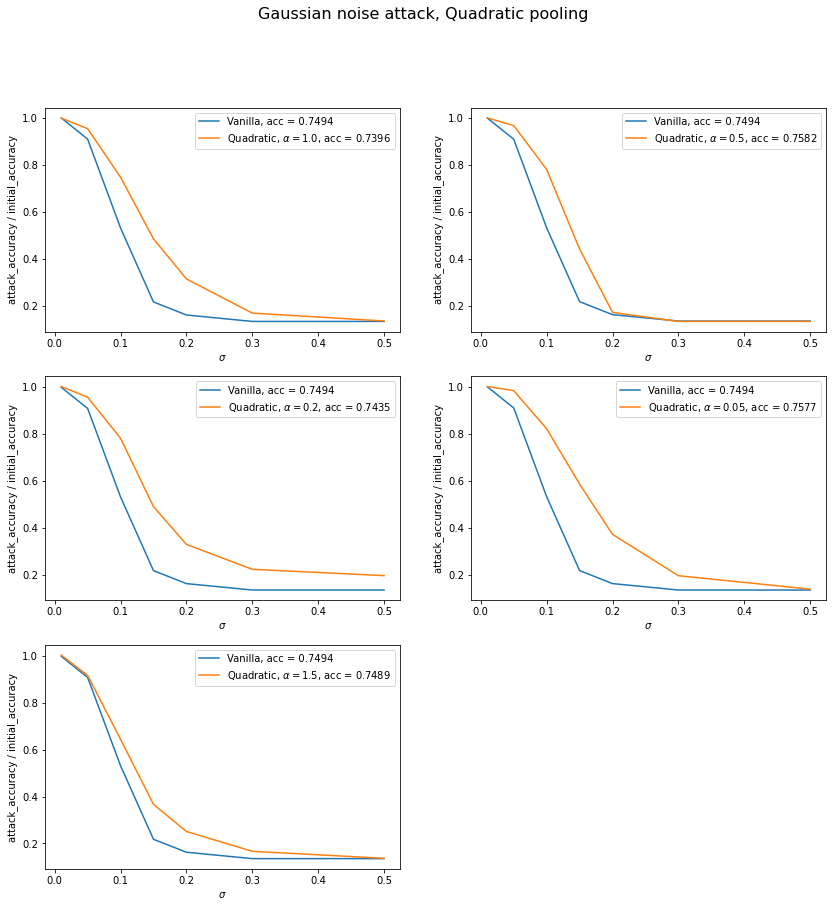

Gaussian noise attack, Quadratic pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.749391,0.739639,0.758167,0.743540,0.757679,0.748903
1,0.01,0.748415,0.738176,0.757679,0.745002,0.757679,0.751828
2,0.05,0.681131,0.705022,0.733301,0.711360,0.744515,0.686982
3,0.10,0.398342,0.552413,0.591419,0.581180,0.621648,0.482691
4,0.15,0.162847,0.358849,0.334471,0.364213,0.443198,0.274500
5,0.20,0.121404,0.233057,0.130180,0.244759,0.281326,0.187713
6,0.30,0.100926,0.125792,0.100926,0.165773,0.148220,0.124330
7,0.50,0.100926,0.100926,0.100926,0.145783,0.104827,0.101902


In [25]:
robust_title = "Quadratic"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["quadratic"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

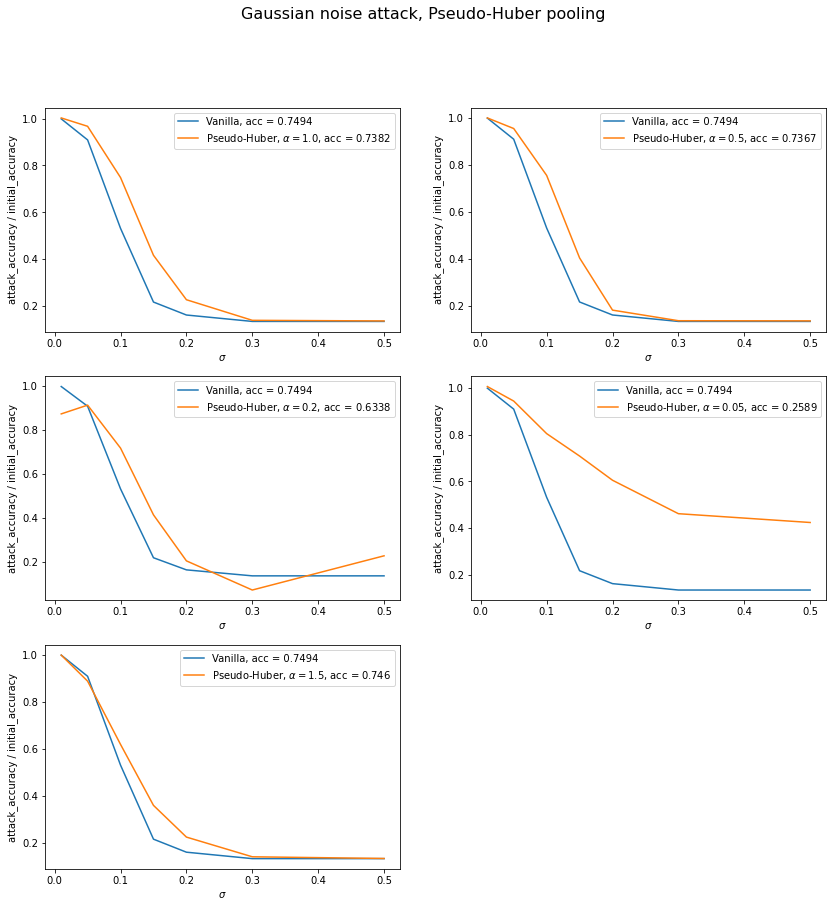

Gaussian noise attack, Pseudo-Huber pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.749391,0.738176,0.736714,0.633837,0.258898,0.745978
1,0.01,0.748415,0.740127,0.736226,0.553876,0.260361,0.745002
2,0.05,0.681131,0.713798,0.703072,0.579230,0.244271,0.662604
3,0.10,0.398342,0.552413,0.556314,0.454900,0.208191,0.462214
4,0.15,0.162847,0.307655,0.297903,0.261824,0.183325,0.269137
5,0.20,0.121404,0.167723,0.134569,0.128718,0.156509,0.168698
6,0.30,0.100926,0.102877,0.101414,0.044369,0.119454,0.106290
7,0.50,0.100926,0.100926,0.100926,0.143345,0.109703,0.100926


In [26]:
robust_title = "Pseudo-Huber"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["pseudo-huber"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

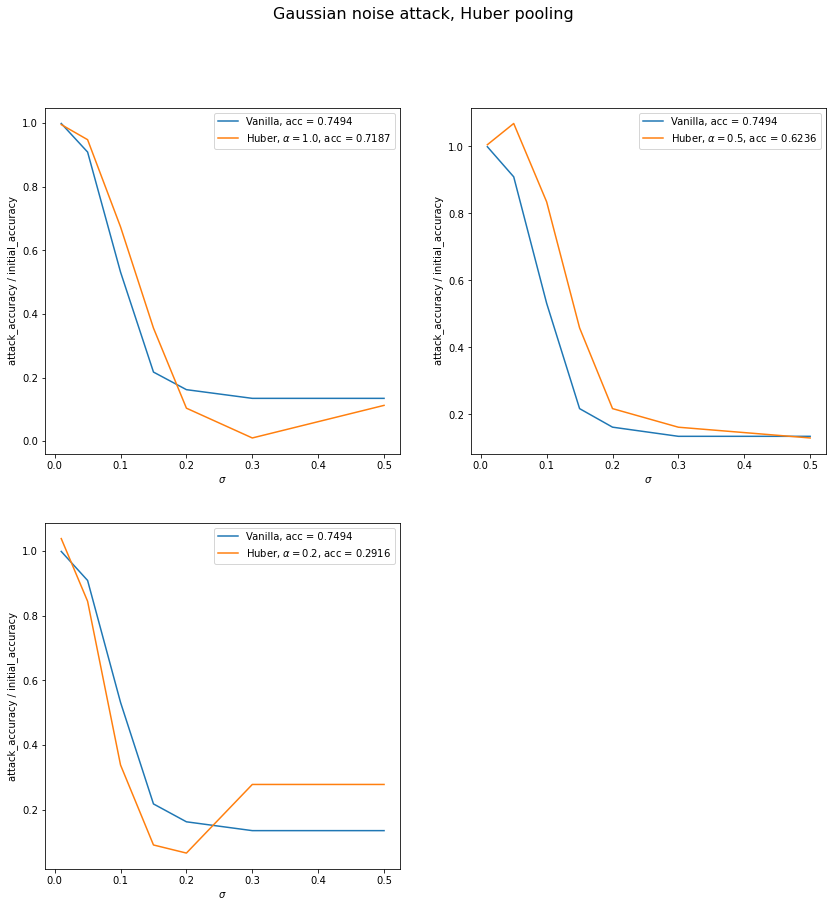

Gaussian noise attack, Huber pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2
0,0.00,0.749391,0.718674,0.623598,0.291565
1,0.01,0.748415,0.715261,0.626524,0.302779
2,0.05,0.681131,0.681131,0.666017,0.246221
3,0.10,0.398342,0.484154,0.520234,0.098489
4,0.15,0.162847,0.255485,0.285714,0.026329
5,0.20,0.121404,0.074598,0.135544,0.019015
6,0.30,0.100926,0.007314,0.100926,0.080936
7,0.50,0.100926,0.080936,0.080936,0.080936


In [27]:
robust_title = "Huber"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["huber"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

## Fast Gradient Sign Method  (FGSM)

In [28]:
with open('result_fgsm.json') as json_file:
    result_fgsm = json.load(json_file)

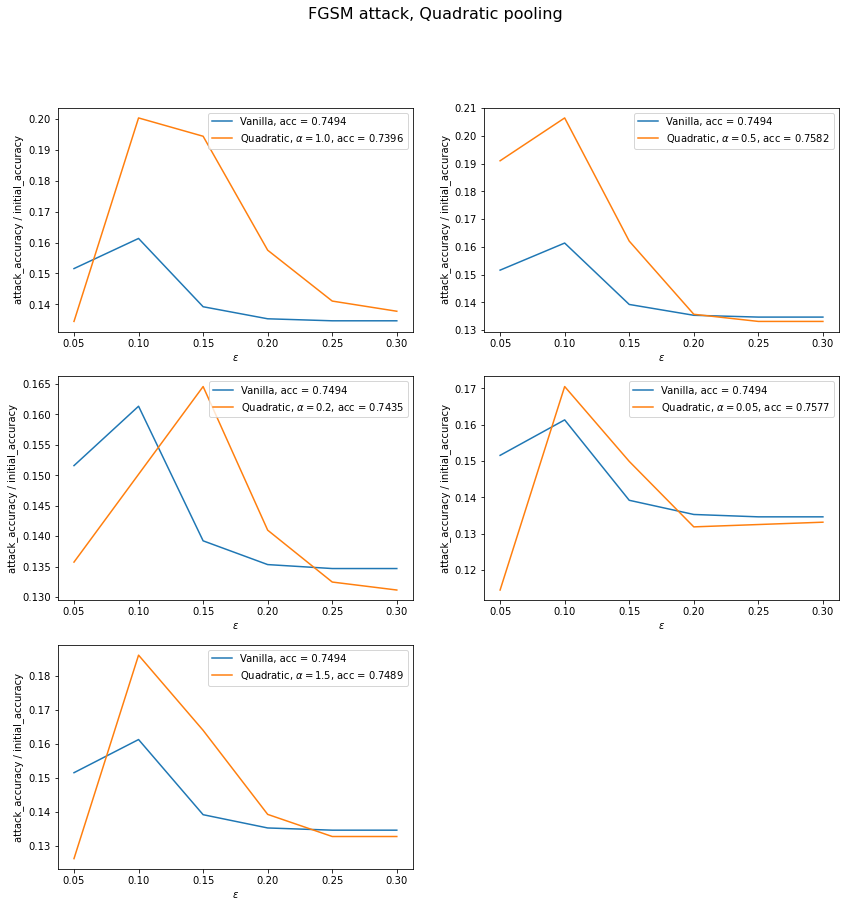

FGSM attack, Quadratic pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.749391,0.739639,0.758167,0.743540,0.757679,0.748903
1,0.05,0.113603,0.099464,0.144807,0.100926,0.086787,0.094588
2,0.10,0.120917,0.148220,0.156509,0.111653,0.129205,0.139444
3,0.15,0.104339,0.143832,0.122867,0.122379,0.113603,0.122867
4,0.20,0.101414,0.116529,0.102877,0.104827,0.099951,0.104339
5,0.25,0.100926,0.104339,0.100926,0.098489,0.100439,0.099464
6,0.30,0.100926,0.101902,0.100926,0.097513,0.100926,0.099464


In [30]:
robust_title = "Quadratic"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["quadratic"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df

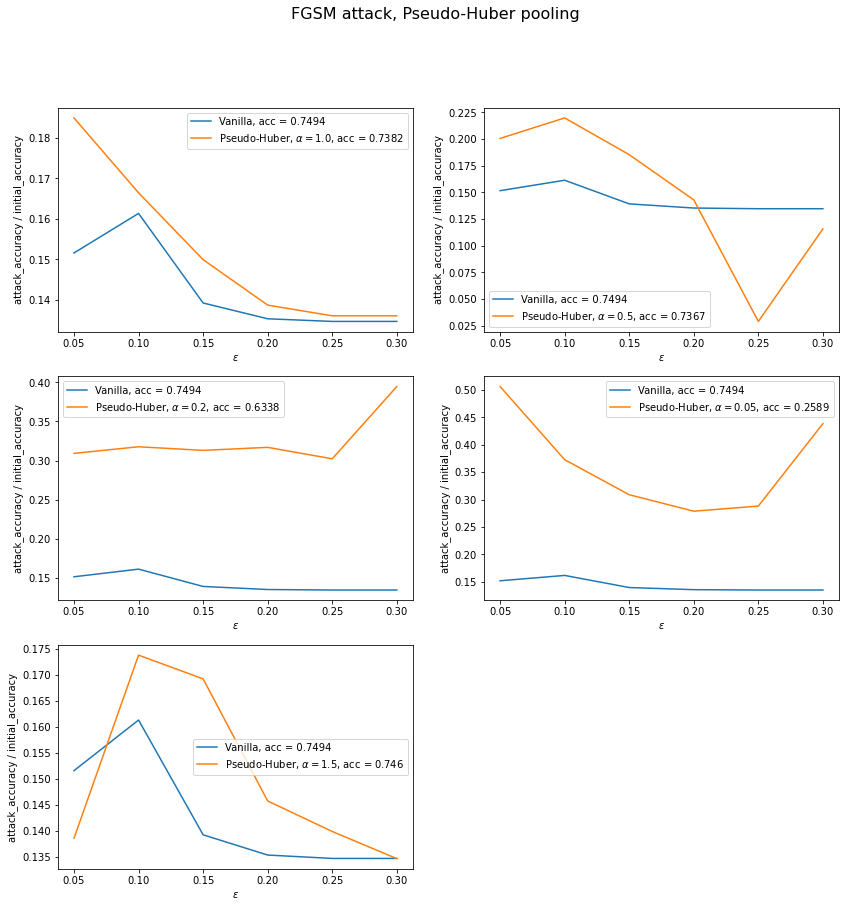

FGSM attack, Pseudo-Huber pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.749391,0.738176,0.736714,0.633837,0.258898,0.745978
1,0.05,0.113603,0.136519,0.147733,0.196002,0.131156,0.103364
2,0.10,0.120917,0.122867,0.161872,0.201365,0.096538,0.129693
3,0.15,0.104339,0.110678,0.136519,0.198440,0.079961,0.126280
4,0.20,0.101414,0.102389,0.105314,0.200878,0.072160,0.108727
5,0.25,0.100926,0.100439,0.021453,0.191614,0.074598,0.104339
6,0.30,0.100926,0.100439,0.085324,0.250122,0.113603,0.100439


In [31]:
robust_title = "Pseudo-Huber"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["pseudo-huber"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df

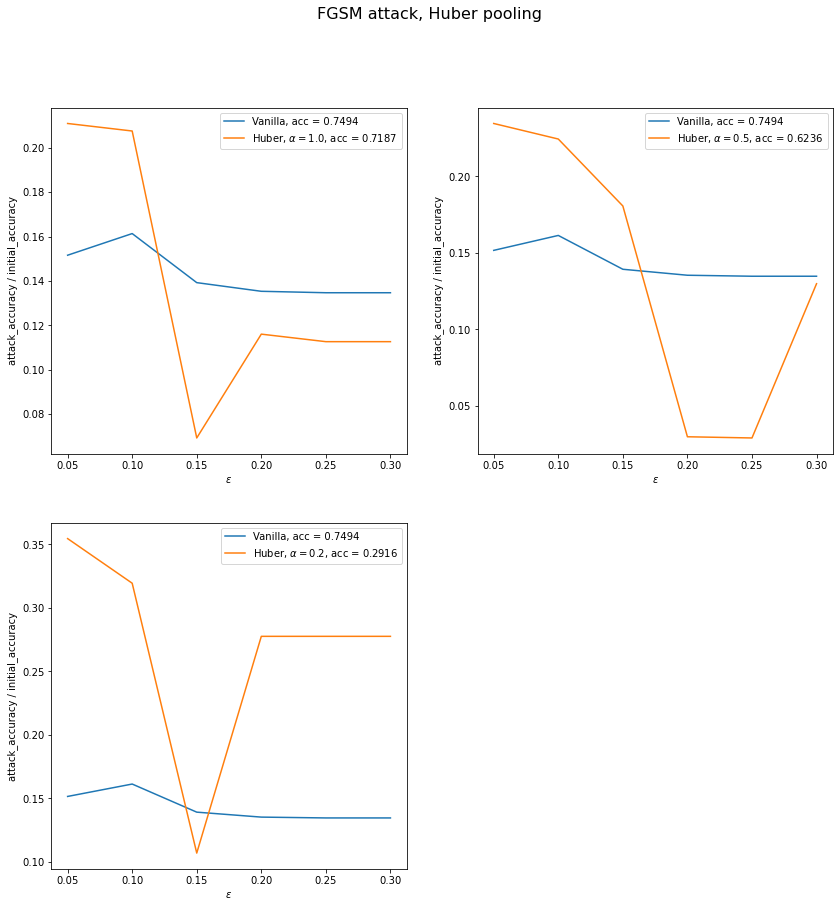

FGSM attack, Huber pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2
0,0.00,0.749391,0.718674,0.623598,0.291565
1,0.05,0.113603,0.151633,0.146270,0.103364
2,0.10,0.120917,0.149196,0.139932,0.093125
3,0.15,0.104339,0.049732,0.112628,0.031204
4,0.20,0.101414,0.083374,0.018528,0.080936
5,0.25,0.100926,0.080936,0.018040,0.080936
6,0.30,0.100926,0.080936,0.080936,0.080936


In [32]:
robust_title = "Huber"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["huber"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df